In [1]:
from yellowbrick.datasets.loaders import load_occupancy
from yellowbrick.features import Rank1D
from yellowbrick.features import Rank2D
import datapane as dp 
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
report = []

In [3]:
X, y = load_occupancy()

In [4]:
X.head(10)

,temperature,relative humidity,light,CO2,humidity
0,23.180,27.2720,426.0,721.250000,0.004793
1,23.150,27.2675,429.5,714.000000,0.004783
2,23.150,27.2450,426.0,713.500000,0.004779
3,23.150,27.2000,426.0,708.250000,0.004772
4,23.100,27.2000,426.0,704.500000,0.004757
5,23.100,27.2000,419.0,701.000000,0.004757
6,23.100,27.2000,419.0,701.666667,0.004757
7,23.100,27.2000,419.0,699.000000,0.004757
8,23.100,27.2000,419.0,689.333333,0.004757
9,23.075,27.1750,419.0,688.000000,0.004745


In [5]:
report.append(dp.DataTable(pd.concat([X, y],axis=1)))

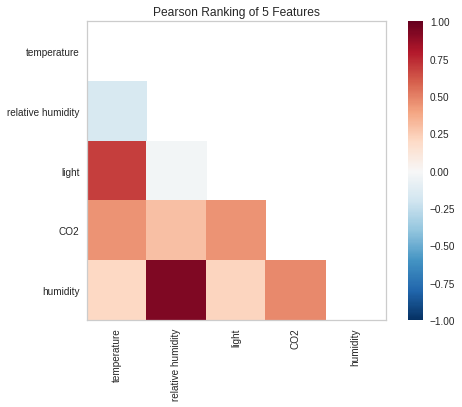

<AxesSubplot:title={'center':'Pearson Ranking of 5 Features'}>

In [6]:
fig, ax = plt.subplots()
visualizer = Rank2D(algorithm='pearson')
visualizer.fit(X, y)           # Fit the data to the visualizer
visualizer.transform(X)        # Transform the data
visualizer.show()              # Finalize and render the figure

In [7]:
report.append(dp.Plot(fig))

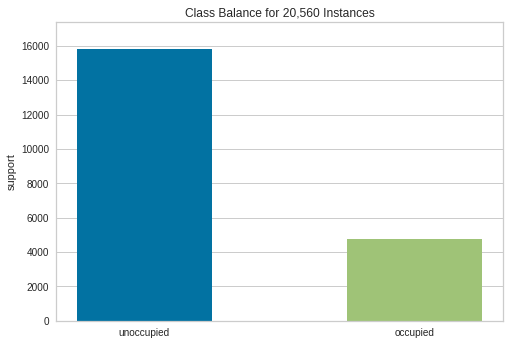

<AxesSubplot:title={'center':'Class Balance for 20,560 Instances'}, ylabel='support'>

In [8]:
from yellowbrick.target import ClassBalance

fig, ax = plt.subplots()
visualizer = ClassBalance(labels=["unoccupied", "occupied"])

visualizer.fit(y)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [9]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

# Specify the target classes
classes = ["unoccupied", "occupied"]

# Create the training and test data
tscv = TimeSeriesSplit()
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

model = DecisionTreeClassifier()

model.fit(X_train, y_train)
pred = model.predict(X_test)

f1_score(y_test, pred)

0.9767016902695295

In [10]:
from yellowbrick.classifier import classification_report

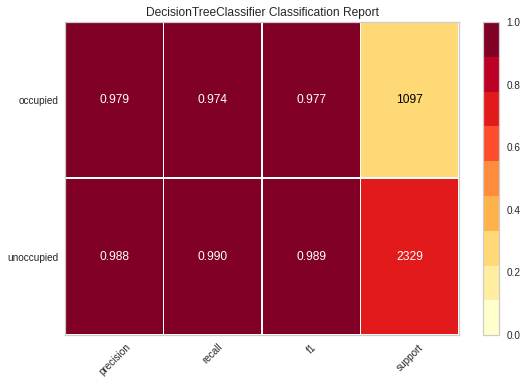

In [11]:
# Instantiate the visualizer
fig, ax = plt.subplots()

visualizer = classification_report(
    model, X_train, y_train, X_test, y_test, classes=classes, support=True
)

In [12]:
report.append(dp.Plot(fig))

In [13]:
from yellowbrick.classifier import ConfusionMatrix

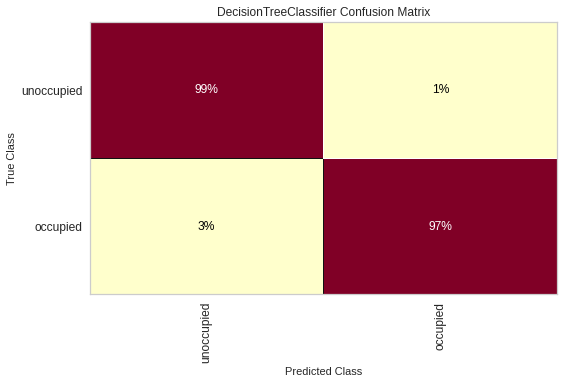

<AxesSubplot:title={'center':'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [14]:
fig, ax = plt.subplots()
cm = ConfusionMatrix(model, classes=classes, percent=True)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

In [15]:
report.append(dp.Plot(fig))

In [16]:
from yellowbrick.classifier import ROCAUC

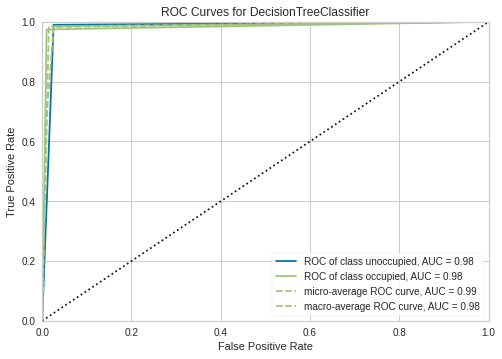

<AxesSubplot:title={'center':'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [18]:
fig, ax = plt.subplots()

visualizer = ROCAUC(model, classes=classes)
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show()

In [19]:
report.append(dp.Plot(fig))

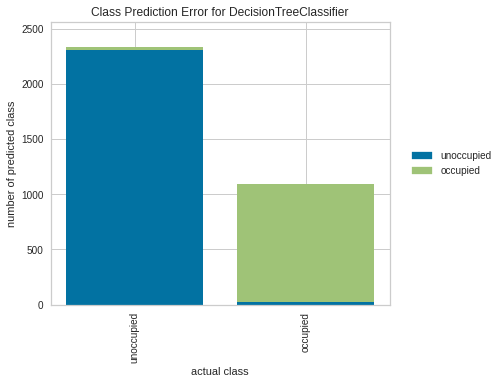

<AxesSubplot:title={'center':'Class Prediction Error for DecisionTreeClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [20]:
from yellowbrick.classifier import ClassPredictionError

# Instantiate the classification model and visualizer
visualizer = ClassPredictionError(model, classes=classes)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

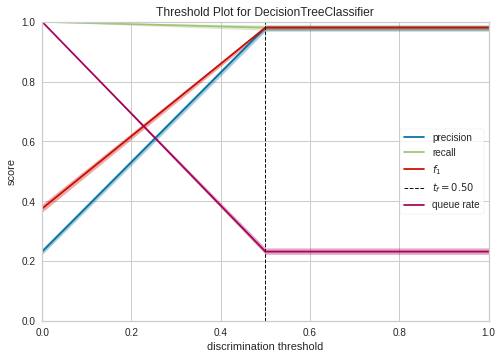

<AxesSubplot:title={'center':'Threshold Plot for DecisionTreeClassifier'}, xlabel='discrimination threshold', ylabel='score'>

In [21]:
from yellowbrick.classifier import DiscriminationThreshold

fig, ax = plt.subplots()

visualizer = DiscriminationThreshold(model)
visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

In [22]:
report.append(dp.Plot(fig))

In [23]:
from yellowbrick.model_selection import validation_curve

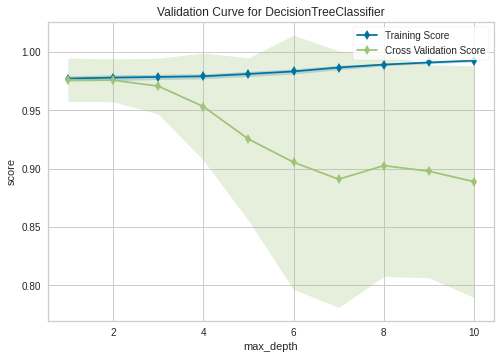

In [24]:
fig, ax = plt.subplots()

viz = validation_curve(
    model, X, y, param_name="max_depth",
    param_range=np.arange(1, 11), cv=10, scoring="f1",
)

In [25]:
report.append(dp.Plot(fig))

### Learning Curve 

In [26]:
from yellowbrick.model_selection import LearningCurve
from sklearn.model_selection import StratifiedKFold

In [27]:
# Create the learning curve visualizer
cv = StratifiedKFold(n_splits=12)
sizes = np.linspace(0.3, 1.0, 10)

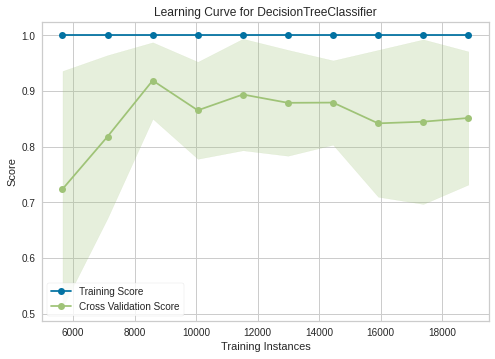

<AxesSubplot:title={'center':'Learning Curve for DecisionTreeClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [28]:
fig, ax = plt.subplots()

visualizer = LearningCurve(
    model, cv=cv, scoring='f1', train_sizes=sizes, 
)

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

In [29]:
report.append(dp.Plot(fig))

In [30]:
from yellowbrick.model_selection import CVScores

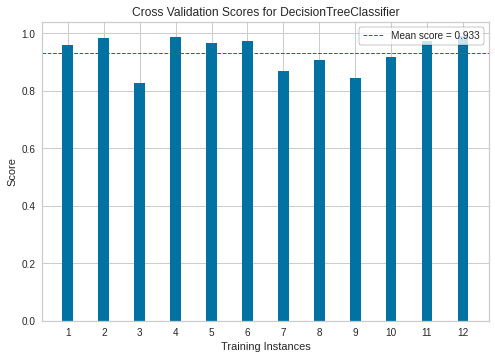

<AxesSubplot:title={'center':'Cross Validation Scores for DecisionTreeClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [31]:
# Create a cross-validation strategy
cv = StratifiedKFold(n_splits=12)

fig, ax = plt.subplots()

# Instantiate the classification model and visualizer
visualizer = CVScores(model, cv=cv, scoring='f1_weighted')

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

In [32]:
report.append(dp.Plot(fig))

In [33]:
from yellowbrick.model_selection import FeatureImportances

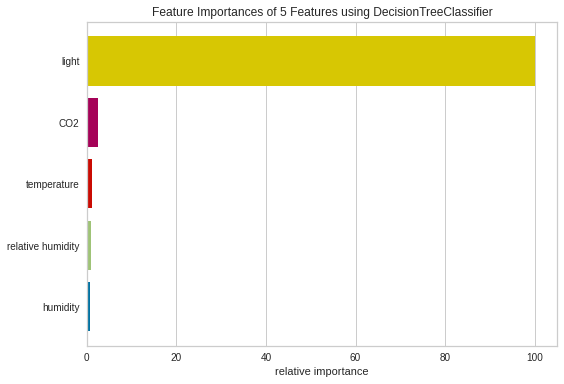

<AxesSubplot:title={'center':'Feature Importances of 5 Features using DecisionTreeClassifier'}, xlabel='relative importance'>

In [34]:
fig, ax = plt.subplots()

viz = FeatureImportances(model)
viz.fit(X, y)
viz.show()

In [35]:
report.append(dp.Plot(fig))